In [1]:
import numpy as np
from tensorflow import keras
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

Tensorflow version: 2.4.0


## Hyperparameters

In [2]:
batch_size = 32
seq_len = 128

d_k = 256
d_v = 256
n_heads = 12
ff_dim = 256


## Load EURUSD data

In [8]:
IBM_path = 'content/10min Dataset.csv'

df = pd.read_csv(IBM_path, delimiter=';', usecols=['Dates', 'EURUSD BGNE Curncy Bid Open', 'EURUSD BGNE Curncy Bid Close', 'EURUSD BGNE Curncy Bid High', 'EURUSD BGNE Curncy Bid Low', 'EURUSD BGNE Curncy Bid Number Ticks', 'EURUSD BGNE Curncy Ask Open', 'EURUSD BGNE Curncy Ask Close', 'EURUSD BGNE Curncy Ask High', 'EURUSD BGNE Curncy Ask Low', 'EURUSD BGNE Curncy Ask Number Ticks', 'USDJPY BGNE Curncy Bid Open', 'USDJPY BGNE Curncy Bid Close', 'USDJPY BGNE Curncy Bid High', 'USDJPY BGNE Curncy Bid Low', 'USDJPY BGNE Curncy Bid Number Ticks', 'USDJPY BGNE Curncy Ask Open', 'USDJPY BGNE Curncy Ask Close', 'USDJPY BGNE Curncy Ask High', 'USDJPY BGNE Curncy Ask Low', 'USDJPY BGNE Curncy Ask Number Ticks', 'GBPUSD BGNE Curncy Bid Open', 'GBPUSD BGNE Curncy Bid Close', 'GBPUSD BGNE Curncy Bid High', 'GBPUSD BGNE Curncy Bid Low', 'GBPUSD BGNE Curncy Bid Number Ticks', 'GBPUSD BGNE Curncy Ask Open', 'GBPUSD BGNE Curncy Ask Close', 'GBPUSD BGNE Curncy Ask High', 'GBPUSD BGNE Curncy Ask Low', 'GBPUSD BGNE Curncy Ask Number Ticks', 'AUDUSD BGNE Curncy Bid Open', 'AUDUSD BGNE Curncy Bid Close', 'AUDUSD BGNE Curncy Bid High', 'AUDUSD BGNE Curncy Bid Low', 'AUDUSD BGNE Curncy Bid Number Ticks', 'AUDUSD BGNE Curncy Ask Open', 'AUDUSD BGNE Curncy Ask Close', 'AUDUSD BGNE Curncy Ask High', 'AUDUSD BGNE Curncy Ask Low', 'AUDUSD BGNE Curncy Ask Number Ticks', 'USDCAD BGNE Curncy Bid Open', 'USDCAD BGNE Curncy Bid Close', 'USDCAD BGNE Curncy Bid High', 'USDCAD BGNE Curncy Bid Low', 'USDCAD BGNE Curncy Bid Number Ticks', 'USDCAD BGNE Curncy Ask Open', 'USDCAD BGNE Curncy Ask Close', 'USDCAD BGNE Curncy Ask High', 'USDCAD BGNE Curncy Ask Low', 'USDCAD BGNE Curncy Ask Number Ticks', 'USDCHF BGNE Curncy Bid Open', 'USDCHF BGNE Curncy Bid Close', 'USDCHF BGNE Curncy Bid High', 'USDCHF BGNE Curncy Bid Low', 'USDCHF BGNE Curncy Bid Number Ticks', 'USDCHF BGNE Curncy Ask Open', 'USDCHF BGNE Curncy Ask Close', 'USDCHF BGNE Curncy Ask High', 'USDCHF BGNE Curncy Ask Low', 'USDCHF BGNE Curncy Ask Number Ticks', 'NZDUSD BGNE Curncy Bid Open', 'NZDUSD BGNE Curncy Bid Close', 'NZDUSD BGNE Curncy Bid High', 'NZDUSD BGNE Curncy Bid Low', 'NZDUSD BGNE Curncy Bid Number Ticks', 'NZDUSD BGNE Curncy Ask Open', 'NZDUSD BGNE Curncy Ask Close', 'NZDUSD BGNE Curncy Ask High', 'NZDUSD BGNE Curncy Ask Low', 'NZDUSD BGNE Curncy Ask Number Ticks', 'EURJPY BGNE Curncy Bid Open', 'EURJPY BGNE Curncy Bid Close', 'EURJPY BGNE Curncy Bid High', 'EURJPY BGNE Curncy Bid Low', 'EURJPY BGNE Curncy Bid Number Ticks', 'EURJPY BGNE Curncy Ask Open', 'EURJPY BGNE Curncy Ask Close', 'EURJPY BGNE Curncy Ask High', 'EURJPY BGNE Curncy Ask Low', 'EURJPY BGNE Curncy Ask Number Ticks', 'GBPJPY BGNE Curncy Bid Open', 'GBPJPY BGNE Curncy Bid Close', 'GBPJPY BGNE Curncy Bid High', 'GBPJPY BGNE Curncy Bid Low', 'GBPJPY BGNE Curncy Bid Number Ticks', 'GBPJPY BGNE Curncy Ask Open', 'GBPJPY BGNE Curncy Ask Close', 'GBPJPY BGNE Curncy Ask High', 'GBPJPY BGNE Curncy Ask Low', 'GBPJPY BGNE Curncy Ask Number Ticks', 'EURGBP BGNE Curncy Bid Open', 'EURGBP BGNE Curncy Bid Close', 'EURGBP BGNE Curncy Bid High', 'EURGBP BGNE Curncy Bid Low', 'EURGBP BGNE Curncy Bid Number Ticks', 'EURGBP BGNE Curncy Ask Open', 'EURGBP BGNE Curncy Ask Close', 'EURGBP BGNE Curncy Ask High', 'EURGBP BGNE Curncy Ask Low', 'EURGBP BGNE Curncy Ask Number Ticks', 'AUDJPY BGNE Curncy Bid Open', 'AUDJPY BGNE Curncy Bid Close', 'AUDJPY BGNE Curncy Bid High', 'AUDJPY BGNE Curncy Bid Low', 'AUDJPY BGNE Curncy Bid Number Ticks', 'AUDJPY BGNE Curncy Ask Open', 'AUDJPY BGNE Curncy Ask Close', 'AUDJPY BGNE Curncy Ask High', 'AUDJPY BGNE Curncy Ask Low', 'AUDJPY BGNE Curncy Ask Number Ticks', 'EURAUD BGNE Curncy Bid Open', 'EURAUD BGNE Curncy Bid Close', 'EURAUD BGNE Curncy Bid High', 'EURAUD BGNE Curncy Bid Low', 'EURAUD BGNE Curncy Bid Number Ticks', 'EURAUD BGNE Curncy Ask Open', 'EURAUD BGNE Curncy Ask Close', 'EURAUD BGNE Curncy Ask High', 'EURAUD BGNE Curncy Ask Low', 'EURAUD BGNE Curncy Ask Number Ticks', 'EURCHF BGNE Curncy Bid Open', 'EURCHF BGNE Curncy Bid Close', 'EURCHF BGNE Curncy Bid High', 'EURCHF BGNE Curncy Bid Low', 'EURCHF BGNE Curncy Bid Number Ticks', 'EURCHF BGNE Curncy Ask Open', 'EURCHF BGNE Curncy Ask Close', 'EURCHF BGNE Curncy Ask High', 'EURCHF BGNE Curncy Ask Low', 'EURCHF BGNE Curncy Ask Number Ticks', 'AUDNZD BGNE Curncy Bid Open', 'AUDNZD BGNE Curncy Bid Close', 'AUDNZD BGNE Curncy Bid High', 'AUDNZD BGNE Curncy Bid Low', 'AUDNZD BGNE Curncy Bid Number Ticks', 'AUDNZD BGNE Curncy Ask Open', 'AUDNZD BGNE Curncy Ask Close', 'AUDNZD BGNE Curncy Ask High', 'AUDNZD BGNE Curncy Ask Low', 'AUDNZD BGNE Curncy Ask Number Ticks', 'NZDJPY BGNE Curncy Bid Open', 'NZDJPY BGNE Curncy Bid Close', 'NZDJPY BGNE Curncy Bid High', 'NZDJPY BGNE Curncy Bid Low', 'NZDJPY BGNE Curncy Bid Number Ticks', 'NZDJPY BGNE Curncy Ask Open', 'NZDJPY BGNE Curncy Ask Close', 'NZDJPY BGNE Curncy Ask High', 'NZDJPY BGNE Curncy Ask Low', 'NZDJPY BGNE Curncy Ask Number Ticks', 'GBPAUD BGNE Curncy Bid Open', 'GBPAUD BGNE Curncy Bid Close', 'GBPAUD BGNE Curncy Bid High', 'GBPAUD BGNE Curncy Bid Low', 'GBPAUD BGNE Curncy Bid Number Ticks', 'GBPAUD BGNE Curncy Ask Open', 'GBPAUD BGNE Curncy Ask Close', 'GBPAUD BGNE Curncy Ask High', 'GBPAUD BGNE Curncy Ask Low', 'GBPAUD BGNE Curncy Ask Number Ticks', 'GBPCAD BGNE Curncy Bid Open', 'GBPCAD BGNE Curncy Bid Close', 'GBPCAD BGNE Curncy Bid High', 'GBPCAD BGNE Curncy Bid Low', 'GBPCAD BGNE Curncy Bid Number Ticks', 'GBPCAD BGNE Curncy Ask Open', 'GBPCAD BGNE Curncy Ask Close', 'GBPCAD BGNE Curncy Ask High', 'GBPCAD BGNE Curncy Ask Low', 'GBPCAD BGNE Curncy Ask Number Ticks', 'EURNZD BGNE Curncy Bid Open', 'EURNZD BGNE Curncy Bid Close', 'EURNZD BGNE Curncy Bid High', 'EURNZD BGNE Curncy Bid Low', 'EURNZD BGNE Curncy Bid Number Ticks', 'EURNZD BGNE Curncy Ask Open', 'EURNZD BGNE Curncy Ask Close', 'EURNZD BGNE Curncy Ask High', 'EURNZD BGNE Curncy Ask Low', 'EURNZD BGNE Curncy Ask Number Ticks', 'AUDCAD BGNE Curncy Bid Open', 'AUDCAD BGNE Curncy Bid Close', 'AUDCAD BGNE Curncy Bid High', 'AUDCAD BGNE Curncy Bid Low', 'AUDCAD BGNE Curncy Bid Number Ticks', 'AUDCAD BGNE Curncy Ask Open', 'AUDCAD BGNE Curncy Ask Close', 'AUDCAD BGNE Curncy Ask High', 'AUDCAD BGNE Curncy Ask Low', 'AUDCAD BGNE Curncy Ask Number Ticks', 'GBPCHF BGNE Curncy Bid Open', 'GBPCHF BGNE Curncy Bid Close', 'GBPCHF BGNE Curncy Bid High', 'GBPCHF BGNE Curncy Bid Low', 'GBPCHF BGNE Curncy Bid Number Ticks', 'GBPCHF BGNE Curncy Ask Open', 'GBPCHF BGNE Curncy Ask Close', 'GBPCHF BGNE Curncy Ask High', 'GBPCHF BGNE Curncy Ask Low', 'GBPCHF BGNE Curncy Ask Number Ticks', 'EURUSDV1M Curncy 44278 Open', 'USDJPYV1M Curncy  Open', 'GBPUSDV1M Curncy  Open', 'AUDUSDV1M Curncy  Open', 'USDCADV1M Curncy  Open', 'USDCHFV1M Curncy  Open', 'NZDUSDV1M Curncy  Open', 'EURJPYV1M Curncy  Open', 'GBPJPYV1M Curncy  Open', 'EURGBPV1M Curncy  Open', 'AUDJPYV1M Curncy  Open', 'EURAUDV1M Curncy  Open', 'EURCHFV1M Curncy  Open', 'AUDNZDV1M Curncy  Open', 'NZDJPYV1M Curncy  Open', 'GBPAUDV1M Curncy  Open', 'GBPCADV1M Curncy  Open', 'EURNZDV1M Curncy  Open', 'AUDCADV1M Curncy  Open', 'GBPCHFV1M Curncy  Open', 'EURUSDV3M Curncy Trade Open', 'USDJPYV3M Curncy Trade Open', 'GBPUSDV3M Curncy Trade Open', 'AUDUSDV3M Curncy Trade Open', 'USDCADV3M Curncy Trade Open', 'USDCHFV3M Curncy Trade Open', 'NZDUSDV3M Curncy Trade Open', 'EURJPYV3M Curncy Trade Open', 'GBPJPYV3M Curncy Trade Open', 'EURGBPV3M Curncy Trade Open', 'AUDJPYV3M Curncy Trade Open', 'EURAUDV3M Curncy Trade Open', 'EURCHFV3M Curncy Trade Open', 'AUDNZDV3M Curncy Trade Open', 'NZDJPYV3M Curncy Trade Open', 'GBPAUDV3M Curncy Trade Open', 'GBPCADV3M Curncy Trade Open', 'EURNZDV3M Curncy Trade Open', 'AUDCADV3M Curncy Trade Open', 'GBPCHFV3M Curncy Trade Open', 'EURUSDV1Y Curncy Trade Open', 'USDJPYV1Y Curncy Trade Open', 'GBPUSDV1Y Curncy Trade Open', 'AUDUSDV1Y Curncy Trade Open', 'USDCADV1Y Curncy Trade Open', 'USDCHFV1Y Curncy Trade Open', 'NZDUSDV1Y Curncy Trade Open', 'EURJPYV1Y Curncy Trade Open', 'GBPJPYV1Y Curncy Trade Open', 'EURGBPV1Y Curncy Trade Open', 'AUDJPYV1Y Curncy Trade Open', 'EURAUDV1Y Curncy Trade Open', 'EURCHFV1Y Curncy Trade Open', 'AUDNZDV1Y Curncy Trade Open', 'NZDJPYV1Y Curncy Trade Open', 'GBPAUDV1Y Curncy Trade Open', 'GBPCADV1Y Curncy Trade Open', 'EURNZDV1Y Curncy Trade Open', 'AUDCADV1Y Curncy Trade Open', 'GBPCHFV1Y Curncy Trade Open', 'EURUSD25R1M Curncy Trade Open', 'USDJPY25R1M Curncy Trade Open', 'GBPUSD25R1M Curncy Trade Open', 'AUDUSD25R1M Curncy Trade Open', 'USDCAD25R1M Curncy Trade Open', 'USDCHF25R1M Curncy Trade Open', 'NZDUSD25R1M Curncy Trade Open', 'EURJPY25R1M Curncy Trade Open', 'GBPJPY25R1M Curncy Trade Open', 'EURGBP25R1M Curncy Trade Open', 'AUDJPY25R1M Curncy Trade Open', 'EURAUD25R1M Curncy Trade Open', 'EURCHF25R1M Curncy Trade Open', 'AUDNZD25R1M Curncy Trade Open', 'NZDJPY25R1M Curncy Trade Open', 'GBPAUD25R1M Curncy Trade Open', 'GBPCAD25R1M Curncy Trade Open', 'EURNZD25R1M Curncy Trade Open', 'AUDCAD25R1M Curncy Trade Open', 'GBPCHF25R1M Curncy Trade Open', 'EURUSD25R3M Curncy 44278 Open', 'USDJPY25R3M Curncy  Open', 'GBPUSD25R3M Curncy  Open', 'AUDUSD25R3M Curncy  Open', 'USDCAD25R3M Curncy  Open', 'USDCHF25R3M Curncy  Open', 'NZDUSD25R3M Curncy  Open', 'EURJPY25R3M Curncy  Open', 'GBPJPY25R3M Curncy  Open', 'EURGBP25R3M Curncy  Open', 'AUDJPY25R3M Curncy  Open', 'EURAUD25R3M Curncy  Open', 'EURCHF25R3M Curncy  Open', 'AUDNZD25R3M Curncy  Open', 'NZDJPY25R3M Curncy  Open', 'GBPAUD25R3M Curncy  Open', 'GBPCAD25R3M Curncy  Open', 'EURNZD25R3M Curncy  Open', 'AUDCAD25R3M Curncy  Open', 'GBPCHF25R3M Curncy  Open', 'EURUSDCR Curncy Trade Open', 'USDJPYCR Curncy Trade Open', 'GBPUSDCR Curncy Trade Open', 'AUDUSDCR Curncy Trade Open', 'USDCADCR Curncy Trade Open', 'USDCHFCR Curncy Trade Open', 'NZDUSDCR Curncy Trade Open', 'EURJPYCR Curncy Trade Open', 'GBPJPYCR Curncy Trade Open', 'EURGBPCR Curncy Trade Open', 'AUDJPYCR Curncy Trade Open', 'EURAUDCR Curncy Trade Open', 'EURCHFCR Curncy Trade Open', 'AUDNZDCR Curncy Trade Open', 'NZDJPYCR Curncy Trade Open', 'GBPAUDCR Curncy Trade Open', 'GBPCADCR Curncy Trade Open', 'EURNZDCR Curncy Trade Open', 'AUDCADCR Curncy Trade Open', 'GBPCHFCR Curncy Trade Open', 'EURUSD1M Curncy Trade Open', 'USDJPY1M Curncy Trade Open', 'GBPUSD1M Curncy Trade Open', 'AUDUSD1M Curncy Trade Open', 'USDCAD1M Curncy Trade Open', 'USDCHF1M Curncy Trade Open', 'NZDUSD1M Curncy Trade Open', 'EURJPY1M Curncy Trade Open', 'GBPJPY1M Curncy Trade Open', 'EURGBP1M Curncy Trade Open', 'AUDJPY1M Curncy Trade Open', 'EURAUD1M Curncy Trade Open', 'EURCHF1M Curncy Trade Open', 'AUDNZD1M Curncy Trade Open', 'NZDJPY1M Curncy Trade Open', 'GBPAUD1M Curncy Trade Open', 'GBPCAD1M Curncy Trade Open', 'EURNZD1M Curncy Trade Open', 'AUDCAD1M Curncy Trade Open', 'GBPCHF1M Curncy Trade Open', 'EURUSD3M Curncy Trade Open', 'USDJPY3M Curncy Trade Open', 'GBPUSD3M Curncy Trade Open', 'AUDUSD3M Curncy Trade Open', 'USDCAD3M Curncy Trade Open', 'USDCHF3M Curncy Trade Open', 'NZDUSD3M Curncy Trade Open', 'EURJPY3M Curncy Trade Open', 'GBPJPY3M Curncy Trade Open', 'EURGBP3M Curncy Trade Open', 'AUDJPY3M Curncy Trade Open', 'EURAUD3M Curncy Trade Open', 'EURCHF3M Curncy Trade Open', 'AUDNZD3M Curncy Trade Open', 'NZDJPY3M Curncy Trade Open', 'GBPAUD3M Curncy Trade Open', 'GBPCAD3M Curncy Trade Open', 'EURNZD3M Curncy Trade Open', 'AUDCAD3M Curncy Trade Open', 'GBPCHF3M Curncy Trade Open', 'CL1 Comdty Trade Open', 'CO1 Comdty Trade Open', 'HG1 Comdty Trade Open', 'UXA1 Comdty Trade Open', 'NG1 Comdty Trade Open', 'GC1 Comdty Trade Open', 'LB1 Comdty Trade Open', 'C 1 Comdty Trade Open', 'S 1 Comdty Trade Open', 'HRC1 Comdty Trade Open', 'XB1 Comdty Trade Open', 'MO1 Comdty Trade Open', 'IOE1 Comdty Trade Open', 'SCO1 Comdty Trade Open', 'SB1 Comdty Trade Open', 'W 1 Comdty Trade Open', 'HO1 Comdty Trade Open', 'KO1 Comdty Trade Open', 'BO1 Comdty Trade Open', 'SI1 Comdty Trade Open', 'USSW10 BGN Curncy Trade Open', 'EUSA10 BGN Curncy Trade Open', 'USSW5 BGN Curncy Trade Open', 'USSW30 BGN Curncy Trade Open', 'USSP10 BGN Curncy Trade Open', 'USSWAP10 BGN Curncy Trade Open', 'EUSA5 BGN Curncy Trade Open', 'EUSA30 BGN Curncy Trade Open', 'USSP30 BGN Curncy Trade Open', 'USSW2 BGN Curncy Trade Open', 'USSWAP5 BGN Curncy Trade Open', 'EUSA20 BGN Curncy Trade Open', 'USSP5 BGN Curncy Trade Open', 'USSW3 BGN Curncy Trade Open', 'USSWIT10 BGN Curncy Trade Open', 'JYBSC BGN Curncy Trade Open', 'JYSW10 BGN Curncy Trade Open', 'ADSWAP10 BGN Curncy Trade Open', 'PZSW5 BGN Curncy Trade Open', 'ES1 Index Trade Open', 'NQ1 Index Trade Open', 'VG1 Index Trade Open', 'GX1 Index Trade Open', 'UX1 Index Trade Open', 'NK1 Index Trade Open', 'RTY1 Index Trade Open', 'XU1 Index Trade Open', 'MES1 Index Trade Open', 'DM1 Index Trade Open', 'TP1 Index Trade Open', 'NH1 Index Trade Open', 'IH1 Index Trade Open', 'XP1 Index Trade Open', 'SP1 Index Trade Open', 'Z 1 Index Trade Open', 'TY1 Comdty Trade Open', 'RX1 Comdty Trade Open', 'JB1 Comdty Trade Open', 'US1 Comdty Trade Open', 'IK1 Comdty Trade Open', 'ED1 Comdty Trade Open', 'WN1 Comdty Trade Open', 'YM1 Comdty Trade Open', 'FV1 Comdty Trade Open', 'G 1 Comdty Trade Open', 'UB1 Comdty Trade Open', 'FF1 Comdty Trade Open', 'OE1 Comdty Trade Open', 'TU1 Comdty Trade Open', 'KE1 Comdty Trade Open', 'DU1 Comdty Trade Open', 'UXY1 Comdty Trade Open', 'CN1 Comdty Trade Open', 'KAA1 Comdty Trade Open'])

# Replace 0 to avoid dividing by 0 later on
df['EURUSD BGNE Curncy Bid Open'].replace(to_replace=0, method='ffill', inplace=True) 
df.sort_values('Dates', inplace=True)
df.tail()

,Dates,EURUSD BGNE Curncy Bid Open,EURUSD BGNE Curncy Bid Close,EURUSD BGNE Curncy Bid High,EURUSD BGNE Curncy Bid Low,EURUSD BGNE Curncy Bid Number Ticks,EURUSD BGNE Curncy Ask Open,EURUSD BGNE Curncy Ask Close,EURUSD BGNE Curncy Ask High,EURUSD BGNE Curncy Ask Low,...,G 1 Comdty Trade Open,UB1 Comdty Trade Open,FF1 Comdty Trade Open,OE1 Comdty Trade Open,TU1 Comdty Trade Open,KE1 Comdty Trade Open,DU1 Comdty Trade Open,UXY1 Comdty Trade Open,CN1 Comdty Trade Open,KAA1 Comdty Trade Open
13243,31.12.20 23:10,1.22128,1.22121,1.22147,1.22121,8,1.22196,1.22174,1.22196,1.22163,...,135.53,225.54,99.91,135.22,110.484375,111.47,112.28,156.25,149.1,129.79
13244,31.12.20 23:20,1.22128,1.22121,1.22147,1.22121,8,1.22196,1.22174,1.22196,1.22163,...,135.53,225.54,99.91,135.22,110.484375,111.47,112.28,156.25,149.1,129.79
13245,31.12.20 23:30,1.22128,1.22121,1.22147,1.22121,8,1.22196,1.22174,1.22196,1.22163,...,135.53,225.54,99.91,135.22,110.484375,111.47,112.28,156.25,149.1,129.79
13246,31.12.20 23:40,1.22128,1.22121,1.22147,1.22121,8,1.22196,1.22174,1.22196,1.22163,...,135.53,225.54,99.91,135.22,110.484375,111.47,112.28,156.25,149.1,129.79
13247,31.12.20 23:50,1.22128,1.22121,1.22147,1.22121,8,1.22196,1.22174,1.22196,1.22163,...,135.53,225.54,99.91,135.22,110.484375,111.47,112.28,156.25,149.1,129.79


## Plot daily EURUSD closing prices and volume

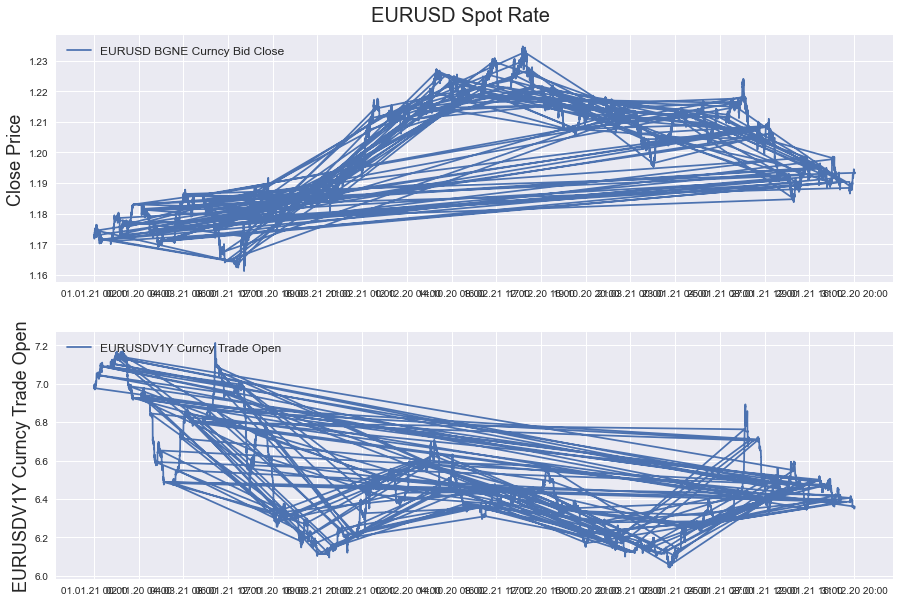

In [10]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("EURUSD Spot Rate", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(df['EURUSD BGNE Curncy Bid Close'], label='EURUSD BGNE Curncy Bid Close')
ax1.set_xticks(range(0, df.shape[0], 1464))
ax1.set_xticklabels(df['Dates'].loc[::1464])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(df['EURUSDV1Y Curncy Trade Open'], label='EURUSDV1Y Curncy Trade Open')
ax2.set_xticks(range(0, df.shape[0], 1464))
ax2.set_xticklabels(df['Dates'].loc[::1464])
ax2.set_ylabel('EURUSDV1Y Curncy Trade Open', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

## Calculate normalized percentage change of all columns

In [24]:
'''Calculate percentage change'''

df['Open'] = df['Open'].pct_change() # Create arithmetic returns column
df['High'] = df['High'].pct_change() # Create arithmetic returns column
df['Low'] = df['Low'].pct_change() # Create arithmetic returns column
df['Close'] = df['Close'].pct_change() # Create arithmetic returns column
df['Volume'] = df['Volume'].pct_change()
df['Value'] = df['Value'].pct_change()
df['Number Ticks'] = df['Number Ticks'].pct_change()

df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################
'''Normalize price columns'''

min_return = min(df[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(df[['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
df['Open'] = (df['Open'] - min_return) / (max_return - min_return)
df['High'] = (df['High'] - min_return) / (max_return - min_return)
df['Low'] = (df['Low'] - min_return) / (max_return - min_return)
df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

###############################################################################
'''Normalize volume column'''

min_volume = df['Volume'].min(axis=0)
max_volume = df['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)

###############################################################################
'''Normalize value column'''

min_value = df['Value'].min(axis=0)
max_value = df['Value'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
df['Value'] = (df['Value'] - min_value) / (max_value - min_value)

###############################################################################
'''Normalize Number Ticks column'''

min_numberticks = df['Number Ticks'].min(axis=0)
max_numberticks = df['Number Ticks'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
df['Number Ticks'] = (df['Number Ticks'] - min_numberticks) / (max_numberticks - min_numberticks)

###############################################################################
'''Create training, validation and test split'''

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

# Remove date column
df_train.drop(columns=['Dates'], inplace=True)
df_val.drop(columns=['Dates'], inplace=True)
df_test.drop(columns=['Dates'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

df_train.head()

Training data shape: (52262, 7)
Validation data shape: (6533, 7)
Test data shape: (6532, 7)


,Open,High,Low,Close,Volume,Value,Number Ticks
1,0.497939,0.508128,0.498788,0.500486,0.083722,0.083740,0.103631
2,0.500486,0.492845,0.498788,0.498788,0.088346,0.088363,0.112219
3,0.497939,0.500486,0.499637,0.497090,0.070295,0.070312,0.093023
4,0.498788,0.493694,0.495391,0.497090,0.065749,0.065762,0.076899
5,0.496241,0.497939,0.501335,0.498788,0.091887,0.091906,0.102621


## Plot daily changes of close prices and volume

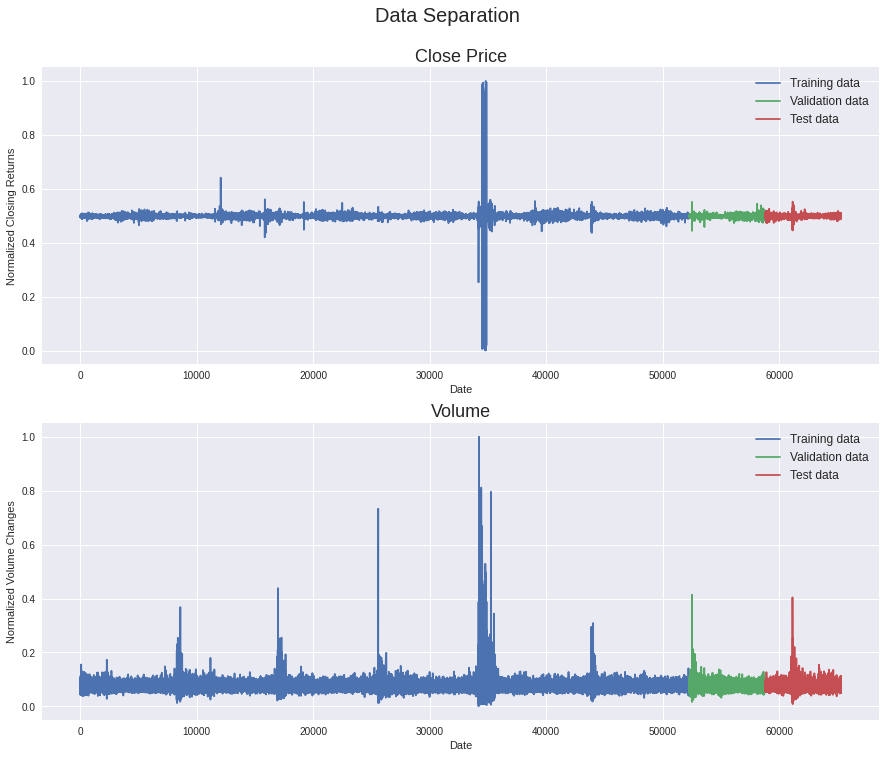

In [25]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
ax2.set_xlabel('Dates')
ax2.set_ylabel('Normalized Volume Changes')
ax2.set_title("Volume", fontsize=18)
ax2.legend(loc="best", fontsize=12)

## Create chunks of training, validation and test data

In [26]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape', X_train.shape, y_train.shape)
print('Validation set shape', X_val.shape, y_val.shape)
print('Testing set shape' ,X_test.shape, y_test.shape)

Training set shape (52134, 128, 7) (52134,)
Validation set shape (6405, 128, 7) (6405,)
Testing set shape (6404, 128, 7) (6404,)


## TimeVector

In [27]:
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config
  

## Transformer

In [28]:
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out    

#############################################################################

class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear   

#############################################################################

class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='relu')
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1] = 7 
    self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config          

## Model

In [29]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 7))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  model = Model(inputs=in_seq, outputs=out)
  opt = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(loss='mse', optimizer=opt, metrics=['mae', 'mape'])
  return model


model = create_model()
model.summary()

callback = tf.keras.callbacks.ModelCheckpoint('content/Transformer+TimeEmbedding.hdf5', 
                                              monitor='val_loss', 
                                              save_best_only=True, verbose=1)
if True: 
    history = model.fit(X_train, y_train, 
                        batch_size=batch_size, 
                        epochs=300, 
                        callbacks=[callback],
                        validation_data=(X_val, y_val))  
# else    
#    model.save(.h5)
#    model.load

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 7)]     0                                            
__________________________________________________________________________________________________
time2_vector_2 (Time2Vector)    (None, 128, 2)       512         input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 128, 9)       0           input_3[0][0]                    
                                                                 time2_vector_2[0][0]             
__________________________________________________________________________________________________
transformer_encoder_6 (Transfor (None, 128, 9)       124726      concatenate_2[0][0]        

1630/1630 [==============================] - 421s 258ms/step - loss: 1.0123e-04 - mae: 0.0039 - mape: 315.9697 - val_loss: 2.6731e-05 - val_mae: 0.0035 - val_mape: 0.6947

Epoch 00054: val_loss did not improve from 0.00003
Epoch 55/300
1630/1630 [==============================] - 421s 258ms/step - loss: 9.5234e-05 - mae: 0.0038 - mape: 946.6833 - val_loss: 2.6764e-05 - val_mae: 0.0035 - val_mape: 0.6938

Epoch 00055: val_loss did not improve from 0.00003
Epoch 56/300
1630/1630 [==============================] - 422s 259ms/step - loss: 1.0592e-04 - mae: 0.0039 - mape: 8209.5420 - val_loss: 2.6674e-05 - val_mae: 0.0034 - val_mape: 0.6883

Epoch 00056: val_loss did not improve from 0.00003
Epoch 57/300
1630/1630 [==============================] - 422s 259ms/step - loss: 8.3378e-05 - mae: 0.0038 - mape: 2808.3745 - val_loss: 2.6774e-05 - val_mae: 0.0035 - val_mape: 0.6943

Epoch 00057: val_loss did not improve from 0.00003
Epoch 58/300
1630/1630 [==============================] - 421s 258m


Epoch 00122: val_loss did not improve from 0.00003
Epoch 123/300
1630/1630 [==============================] - 425s 261ms/step - loss: 4.0920e-05 - mae: 0.0035 - mape: 494.4857 - val_loss: 2.6770e-05 - val_mae: 0.0035 - val_mape: 0.6942

Epoch 00123: val_loss did not improve from 0.00003
Epoch 124/300
1630/1630 [==============================] - 425s 261ms/step - loss: 3.8817e-05 - mae: 0.0035 - mape: 138.5640 - val_loss: 2.6680e-05 - val_mae: 0.0034 - val_mape: 0.6886

Epoch 00124: val_loss did not improve from 0.00003
Epoch 125/300
1630/1630 [==============================] - 424s 260ms/step - loss: 4.3734e-05 - mae: 0.0035 - mape: 211.7371 - val_loss: 2.6908e-05 - val_mae: 0.0035 - val_mape: 0.6989

Epoch 00125: val_loss did not improve from 0.00003
Epoch 126/300
1630/1630 [==============================] - 423s 260ms/step - loss: 4.3381e-05 - mae: 0.0036 - mape: 1454.5794 - val_loss: 2.6693e-05 - val_mae: 0.0034 - val_mape: 0.6899

Epoch 00126: val_loss did not improve from 0.00003


Epoch 00191: val_loss did not improve from 0.00003
Epoch 192/300
1630/1630 [==============================] - 445s 273ms/step - loss: 4.0565e-05 - mae: 0.0035 - mape: 2371.3447 - val_loss: 2.6703e-05 - val_mae: 0.0034 - val_mape: 0.6907

Epoch 00192: val_loss did not improve from 0.00003
Epoch 193/300
1630/1630 [==============================] - 449s 275ms/step - loss: 3.6233e-05 - mae: 0.0034 - mape: 1356.0707 - val_loss: 2.6778e-05 - val_mae: 0.0035 - val_mape: 0.6946

Epoch 00193: val_loss did not improve from 0.00003
Epoch 194/300
1630/1630 [==============================] - 449s 275ms/step - loss: 3.4369e-05 - mae: 0.0034 - mape: 1064.9771 - val_loss: 2.6723e-05 - val_mae: 0.0035 - val_mape: 0.6919

Epoch 00194: val_loss did not improve from 0.00003
Epoch 195/300
1630/1630 [==============================] - 446s 274ms/step - loss: 3.7694e-05 - mae: 0.0035 - mape: 439.3186 - val_loss: 2.6663e-05 - val_mae: 0.0034 - val_mape: 0.6863

Epoch 00195: val_loss did not improve from 0.000


Epoch 00260: val_loss did not improve from 0.00003
Epoch 261/300
1630/1630 [==============================] - 431s 264ms/step - loss: 3.8438e-05 - mae: 0.0034 - mape: 142.1333 - val_loss: 2.6783e-05 - val_mae: 0.0035 - val_mape: 0.6948

Epoch 00261: val_loss did not improve from 0.00003
Epoch 262/300
1630/1630 [==============================] - 430s 264ms/step - loss: 3.7887e-05 - mae: 0.0034 - mape: 2004.7787 - val_loss: 2.6667e-05 - val_mae: 0.0034 - val_mape: 0.6872

Epoch 00262: val_loss did not improve from 0.00003
Epoch 263/300
1630/1630 [==============================] - 431s 264ms/step - loss: 3.6788e-05 - mae: 0.0034 - mape: 6.7038 - val_loss: 2.6683e-05 - val_mae: 0.0034 - val_mape: 0.6896

Epoch 00263: val_loss did not improve from 0.00003
Epoch 264/300
1630/1630 [==============================] - 434s 266ms/step - loss: 3.2978e-05 - mae: 0.0034 - mape: 462.8258 - val_loss: 2.6656e-05 - val_mae: 0.0034 - val_mape: 0.6880

Epoch 00264: val_loss did not improve from 0.00003
E

 
Evaluation metrics
Training Data - Loss: 0.0000, MAE: 0.0035, MAPE: 444.3694
Validation Data - Loss: 0.0000, MAE: 0.0034, MAPE: 0.6880
Test Data - Loss: 0.0000, MAE: 0.0027, MAPE: 0.5467


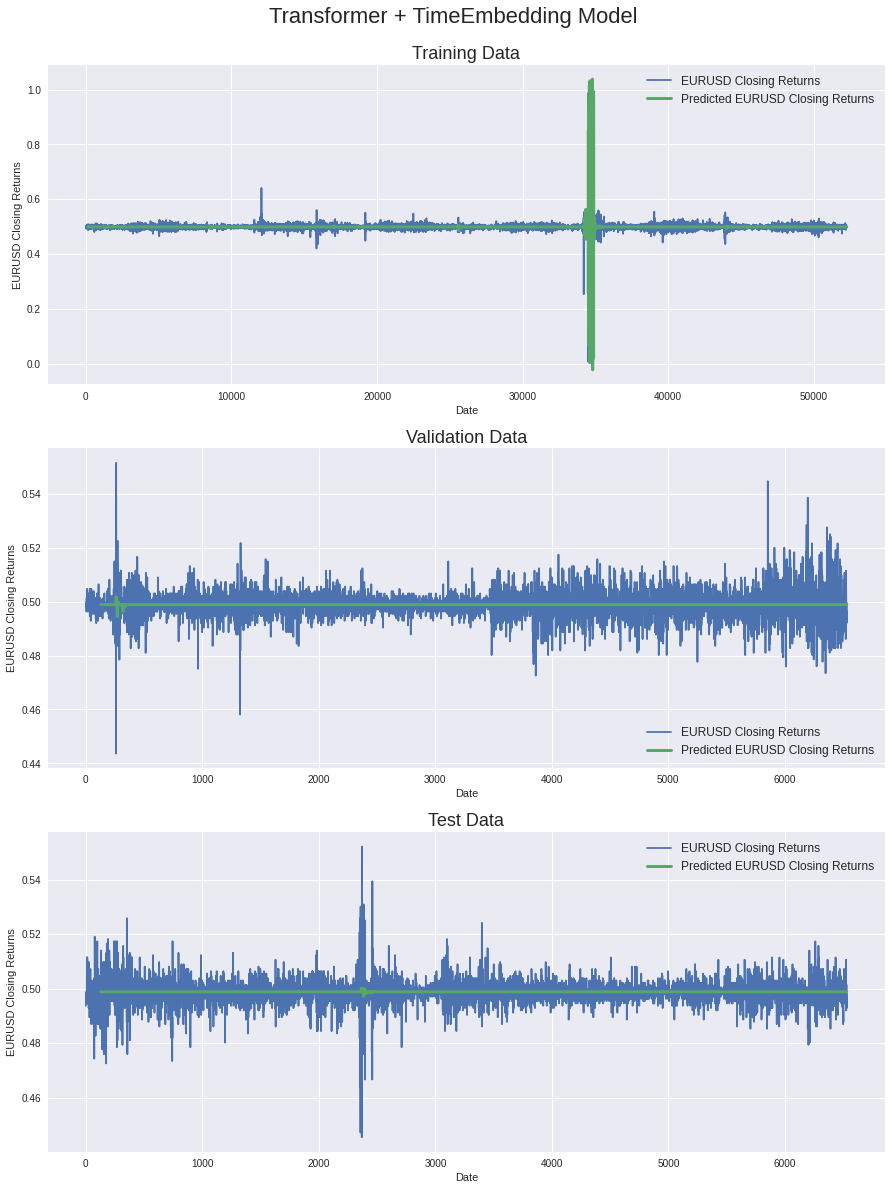

In [30]:
model = tf.keras.models.load_model('content/Transformer+TimeEmbedding.hdf5',
                                   custom_objects={'Time2Vector': Time2Vector, 
                                                   'SingleAttention': SingleAttention,
                                                   'MultiAttention': MultiAttention,
                                                   'TransformerEncoder': TransformerEncoder})


###############################################################################
'''Calculate predictions and metrics'''

#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

###############################################################################
'''Display results'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='EURUSD Closing Returns')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted EURUSD Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Dates')
ax11.set_ylabel('EURUSD Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='EURUSD Closing Returns')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted EURUSD Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Dates')
ax21.set_ylabel('EURUSD Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='EURUSD Closing Returns')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted EURUSD Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Dates')
ax31.set_ylabel('EURUSD Closing Returns')
ax31.legend(loc="best", fontsize=12)

## Model metrics

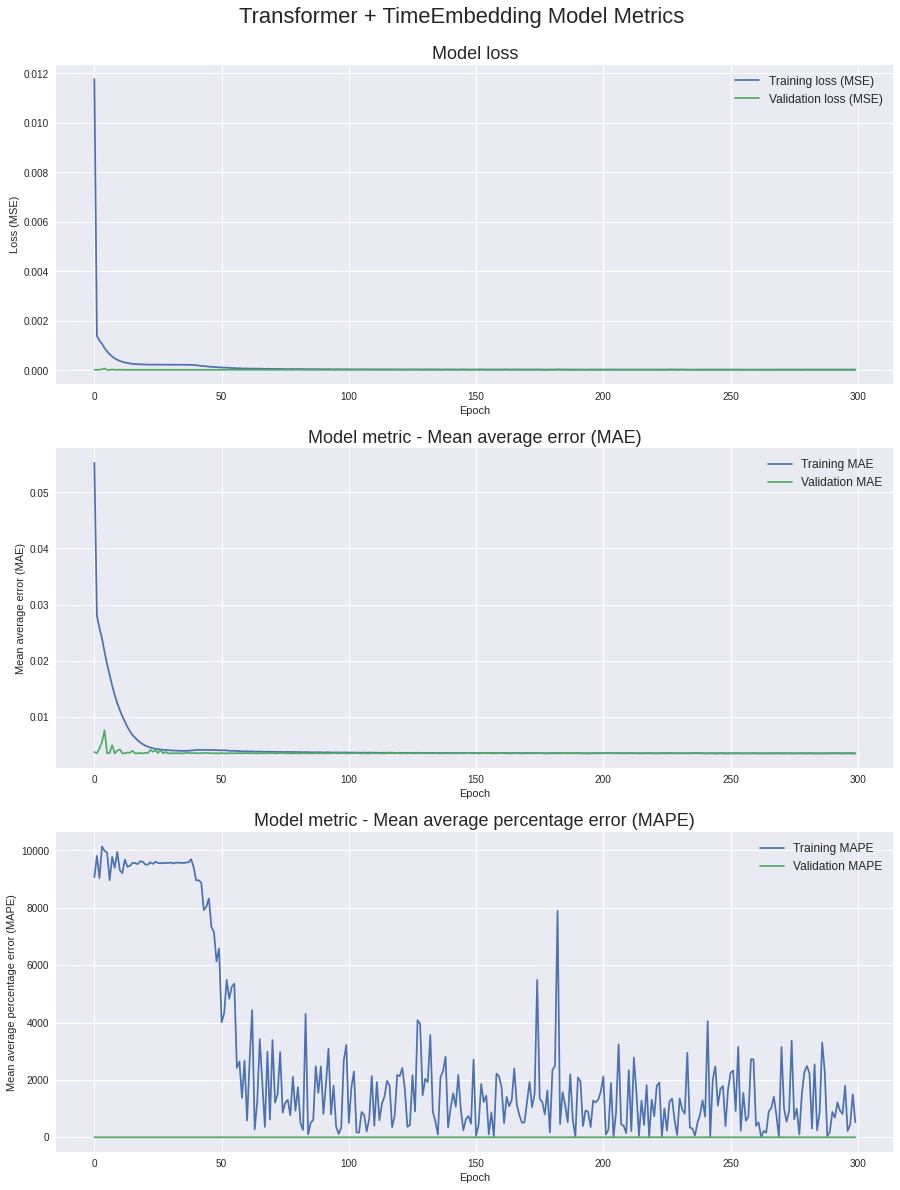

In [31]:
'''Display model metrics'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model Metrics", fontsize=22)
st.set_y(0.92)

#Plot model loss
ax1 = fig.add_subplot(311)
ax1.plot(history.history['loss'], label='Training loss (MSE)')
ax1.plot(history.history['val_loss'], label='Validation loss (MSE)')
ax1.set_title("Model loss", fontsize=18)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend(loc="best", fontsize=12)

#Plot MAE
ax2 = fig.add_subplot(312)
ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title("Model metric - Mean average error (MAE)", fontsize=18)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean average error (MAE)')
ax2.legend(loc="best", fontsize=12)

#Plot MAPE
ax3 = fig.add_subplot(313)
ax3.plot(history.history['mape'], label='Training MAPE')
ax3.plot(history.history['val_mape'], label='Validation MAPE')
ax3.set_title("Model metric - Mean average percentage error (MAPE)", fontsize=18)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean average percentage error (MAPE)')
ax3.legend(loc="best", fontsize=12)

## Model architecture overview

In [32]:
tf.keras.utils.plot_model(
    model,
    to_file="EURUSD_Transformer+TimeEmbedding.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Moving Average

## Moving Average - Load EURUSD data again, to apply rolling window

In [33]:
IBM_path = '/home/RDC/fisertiz/H:/fisertiz/github/paper1_fxpred/EURUSD3.csv'

df = pd.read_csv(IBM_path, delimiter=';', usecols=['Dates', 'Open', 'High', 'Low', 'Close', 'Volume', 'Value', 'Number Ticks'])

# Replace 0 to avoid dividing by 0 later on
df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
df.sort_values('Dates', inplace=True)

# Apply moving average with a window of 10 days to all columns
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Value', 'Number Ticks']] = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Value', 'Number Ticks']].rolling(10).mean() 

# Drop all rows with NaN values
df.dropna(how='any', axis=0, inplace=True) 
df.head()

,Date,Open,High,Low,Close,Volume,Value,Number Ticks
9,15.12.2020 00:01:30,1.214499,1.214533,1.214458,1.214499,140809995.8,171012520.0,22.5
10,15.12.2020 00:01:40,1.214490,1.214527,1.214451,1.214492,142344995.1,172875974.4,22.4
11,15.12.2020 00:01:50,1.214486,1.214512,1.214447,1.214482,144674994.5,175704852.8,22.5
12,15.12.2020 00:02:00,1.214479,1.214504,1.214442,1.214474,148189994.2,179972864.0,22.7
13,15.12.2020 00:02:10,1.214473,1.214495,1.214437,1.214466,145389994.2,176571291.2,21.9


## Moving Average - Plot daily EURUSD closing prices and volume

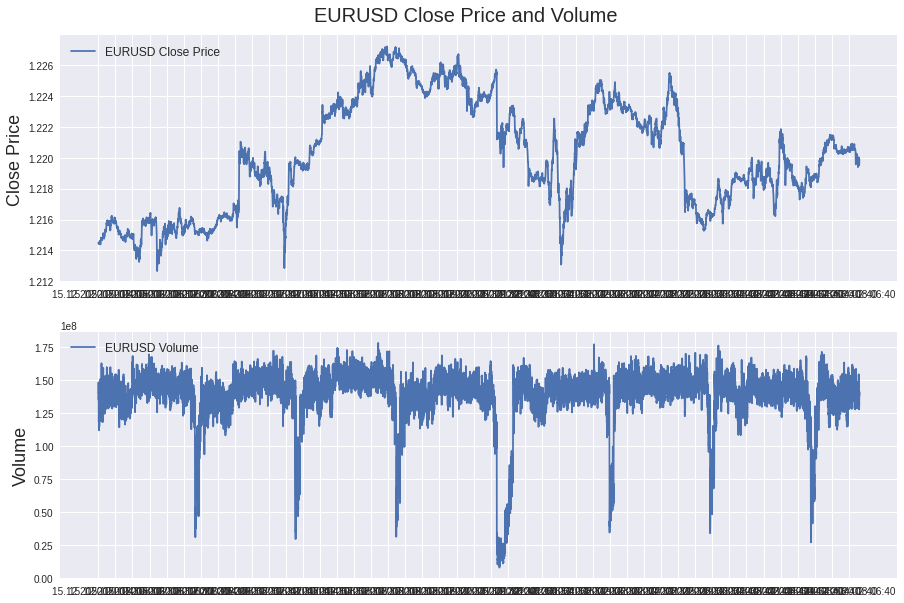

In [34]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("EURUSD Close Price and Volume", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(df['Close'], label='EURUSD Close Price')
ax1.set_xticks(range(0, df.shape[0], 1464))
ax1.set_xticklabels(df['Dates'].loc[::1464])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(df['Volume'], label='EURUSD Volume')
ax2.set_xticks(range(0, df.shape[0], 1464))
ax2.set_xticklabels(df['Dates'].loc[::1464])
ax2.set_ylabel('Volume', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

## Moving Average - Calculate normalized percentage change for all columns

In [35]:
'''Calculate percentage change'''

df['Open'] = df['Open'].pct_change() # Create arithmetic returns column
df['High'] = df['High'].pct_change() # Create arithmetic returns column
df['Low'] = df['Low'].pct_change() # Create arithmetic returns column
df['Close'] = df['Close'].pct_change() # Create arithmetic returns column
df['Volume'] = df['Volume'].pct_change()
df['Value'] = df['Value'].pct_change()
df['Number Ticks'] = df['Number Ticks'].pct_change()

df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################
'''Normalize price columns'''

min_return = min(df[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(df[['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
df['Open'] = (df['Open'] - min_return) / (max_return - min_return)
df['High'] = (df['High'] - min_return) / (max_return - min_return)
df['Low'] = (df['Low'] - min_return) / (max_return - min_return)
df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

###############################################################################
'''Normalize volume column'''

min_volume = df['Volume'].min(axis=0)
max_volume = df['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)

###############################################################################
'''Normalize value column'''

min_value = df['Value'].min(axis=0)
max_value = df['Value'].max(axis=0)

# Min-max normalize value columns (0-1 range)
df['Value'] = (df['Value'] - min_value) / (max_value - min_value)

###############################################################################
'''Normalize number ticks column'''

min_numberticks = df['Number Ticks'].min(axis=0)
max_numberticks = df['Number Ticks'].max(axis=0)

# Min-max normalize number ticks columns (0-1 range)
df['Number Ticks'] = (df['Number Ticks'] - min_numberticks) / (max_numberticks - min_numberticks)

###############################################################################
'''Create training, validation and test split'''

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

# Remove date column
df_train.drop(columns=['Dates'], inplace=True)
df_val.drop(columns=['Dates'], inplace=True)
df_test.drop(columns=['Dates'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

df_train.head()

Training data shape: (52255, 7)
Validation data shape: (6532, 7)
Test data shape: (6531, 7)


,Open,High,Low,Close,Volume,Value,Number Ticks
10,0.475403,0.477879,0.477053,0.477053,0.351210,0.351194,0.359575
11,0.479529,0.470452,0.479529,0.474578,0.357362,0.357345,0.370885
12,0.477053,0.476228,0.478703,0.476228,0.366282,0.366264,0.376502
13,0.477878,0.475403,0.478703,0.476228,0.317684,0.317670,0.320475
14,0.476228,0.479529,0.480354,0.476228,0.355080,0.355067,0.371014


## Moving Average - Plot daily changes of close price and volume

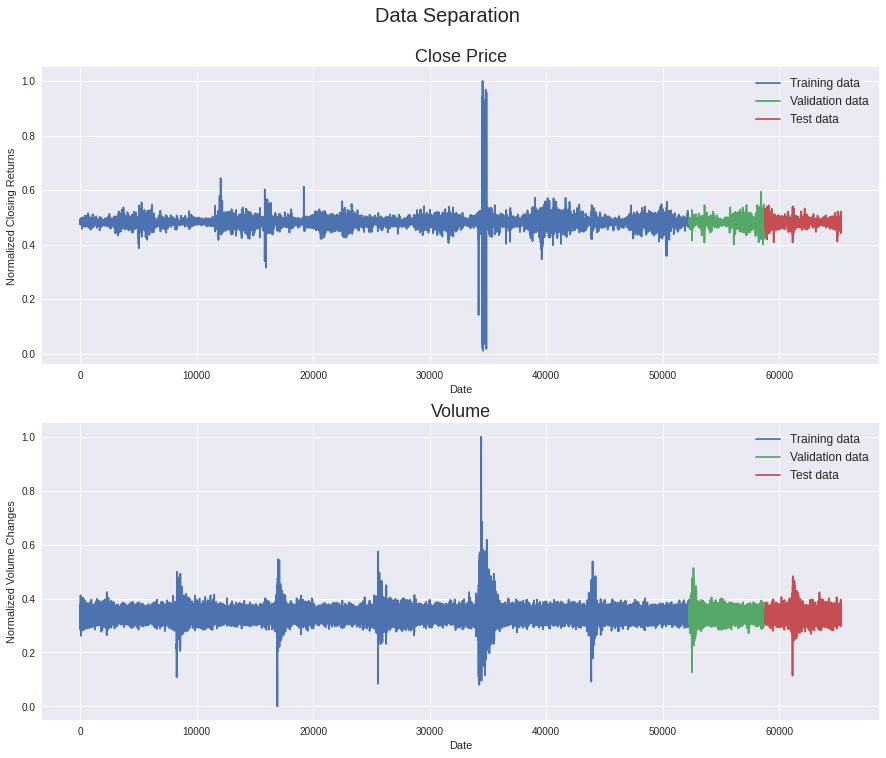

In [36]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
ax2.set_xlabel('Dates')
ax2.set_ylabel('Normalized Volume Changes')
ax2.set_title("Volume", fontsize=18)
ax2.legend(loc="best", fontsize=12)

## Moving Average - Create chunks of training, validation, and test data

In [37]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(52127, 128, 7) (52127,)
(6404, 128, 7) (6404,)


## Moving Average - Model

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 7)]     0                                            
__________________________________________________________________________________________________
time2_vector_4 (Time2Vector)    (None, 128, 2)       512         input_4[0][0]                    
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 128, 9)       0           input_4[0][0]                    
                                                                 time2_vector_4[0][0]             
__________________________________________________________________________________________________
transformer_encoder_12 (Transfo (None, 128, 9)       124726      concatenate_3[0][0]        

1629/1629 [==============================] - 422s 259ms/step - loss: 4.2001e-04 - mae: 0.0107 - mape: 2.9309 - val_loss: 2.1354e-04 - val_mae: 0.0112 - val_mape: 2.3529

Epoch 00056: val_loss improved from 0.00025 to 0.00021, saving model to Transformer+TimeEmbedding.hdf5
Epoch 57/300
1629/1629 [==============================] - 430s 264ms/step - loss: 3.2579e-04 - mae: 0.0092 - mape: 2.2793 - val_loss: 3.2377e-04 - val_mae: 0.0155 - val_mape: 3.2417

Epoch 00057: val_loss did not improve from 0.00021
Epoch 58/300
1629/1629 [==============================] - 435s 267ms/step - loss: 2.7778e-04 - mae: 0.0081 - mape: 2.1271 - val_loss: 3.5699e-04 - val_mae: 0.0164 - val_mape: 3.4380

Epoch 00058: val_loss did not improve from 0.00021
Epoch 59/300
1629/1629 [==============================] - 430s 264ms/step - loss: 2.8927e-04 - mae: 0.0077 - mape: 1.9740 - val_loss: 3.4662e-04 - val_mae: 0.0166 - val_mape: 3.4713

Epoch 00059: val_loss did not improve from 0.00021
Epoch 60/300
1629/1629 [=

1629/1629 [==============================] - 432s 265ms/step - loss: 1.0596e-04 - mae: 0.0063 - mape: 1.4377 - val_loss: 7.7128e-04 - val_mae: 0.0268 - val_mape: 5.5586

Epoch 00091: val_loss did not improve from 0.00021
Epoch 92/300
1629/1629 [==============================] - 432s 265ms/step - loss: 1.1614e-04 - mae: 0.0063 - mape: 1.4844 - val_loss: 6.0318e-04 - val_mae: 0.0234 - val_mape: 4.8804

Epoch 00092: val_loss did not improve from 0.00021
Epoch 93/300
1629/1629 [==============================] - 432s 265ms/step - loss: 1.0875e-04 - mae: 0.0063 - mape: 1.3998 - val_loss: 0.0010 - val_mae: 0.0311 - val_mape: 6.4712

Epoch 00093: val_loss did not improve from 0.00021
Epoch 94/300
1629/1629 [==============================] - 434s 266ms/step - loss: 1.1117e-04 - mae: 0.0063 - mape: 1.5422 - val_loss: 9.6190e-04 - val_mae: 0.0301 - val_mape: 6.2541

Epoch 00094: val_loss did not improve from 0.00021
Epoch 95/300
1629/1629 [==============================] - 433s 266ms/step - loss:

1629/1629 [==============================] - 439s 269ms/step - loss: 9.3325e-05 - mae: 0.0056 - mape: 1.3071 - val_loss: 6.3394e-04 - val_mae: 0.0242 - val_mape: 5.0146

Epoch 00126: val_loss did not improve from 0.00021
Epoch 127/300
1629/1629 [==============================] - 437s 268ms/step - loss: 8.4389e-05 - mae: 0.0056 - mape: 1.2941 - val_loss: 7.2202e-04 - val_mae: 0.0258 - val_mape: 5.3558

Epoch 00127: val_loss did not improve from 0.00021
Epoch 128/300
1629/1629 [==============================] - 441s 271ms/step - loss: 8.7302e-05 - mae: 0.0056 - mape: 1.2793 - val_loss: 8.6164e-04 - val_mae: 0.0283 - val_mape: 5.8716

Epoch 00128: val_loss did not improve from 0.00021
Epoch 129/300
1629/1629 [==============================] - 442s 271ms/step - loss: 8.1299e-05 - mae: 0.0056 - mape: 1.2304 - val_loss: 5.7431e-04 - val_mae: 0.0230 - val_mape: 4.7726

Epoch 00129: val_loss did not improve from 0.00021
Epoch 130/300
1629/1629 [==============================] - 440s 270ms/step

1629/1629 [==============================] - 444s 272ms/step - loss: 7.5021e-05 - mae: 0.0052 - mape: 1.1573 - val_loss: 0.0012 - val_mae: 0.0330 - val_mape: 6.8254

Epoch 00161: val_loss did not improve from 0.00021
Epoch 162/300
1629/1629 [==============================] - 446s 274ms/step - loss: 6.5787e-05 - mae: 0.0051 - mape: 1.1618 - val_loss: 0.0011 - val_mae: 0.0325 - val_mape: 6.7271

Epoch 00162: val_loss did not improve from 0.00021
Epoch 163/300
1629/1629 [==============================] - 445s 273ms/step - loss: 6.7809e-05 - mae: 0.0052 - mape: 1.1575 - val_loss: 0.0010 - val_mae: 0.0311 - val_mape: 6.4485

Epoch 00163: val_loss did not improve from 0.00021
Epoch 164/300
1629/1629 [==============================] - 444s 273ms/step - loss: 6.8217e-05 - mae: 0.0051 - mape: 1.1404 - val_loss: 4.5401e-04 - val_mae: 0.0203 - val_mape: 4.2307

Epoch 00164: val_loss did not improve from 0.00021
Epoch 165/300
1629/1629 [==============================] - 445s 273ms/step - loss: 6.9

1629/1629 [==============================] - 438s 269ms/step - loss: 5.6669e-05 - mae: 0.0048 - mape: 1.0500 - val_loss: 7.9385e-04 - val_mae: 0.0274 - val_mape: 5.6738

Epoch 00231: val_loss did not improve from 0.00021
Epoch 232/300
1629/1629 [==============================] - 437s 268ms/step - loss: 6.2212e-05 - mae: 0.0048 - mape: 1.1094 - val_loss: 9.2890e-04 - val_mae: 0.0296 - val_mape: 6.1303

Epoch 00232: val_loss did not improve from 0.00021
Epoch 233/300
1629/1629 [==============================] - 438s 269ms/step - loss: 5.4467e-05 - mae: 0.0047 - mape: 1.0474 - val_loss: 0.0012 - val_mae: 0.0332 - val_mape: 6.8681

Epoch 00233: val_loss did not improve from 0.00021
Epoch 234/300
1629/1629 [==============================] - 438s 269ms/step - loss: 5.9993e-05 - mae: 0.0048 - mape: 1.0872 - val_loss: 0.0013 - val_mae: 0.0348 - val_mape: 7.2034

Epoch 00234: val_loss did not improve from 0.00021
Epoch 235/300
1629/1629 [==============================] - 435s 267ms/step - loss:

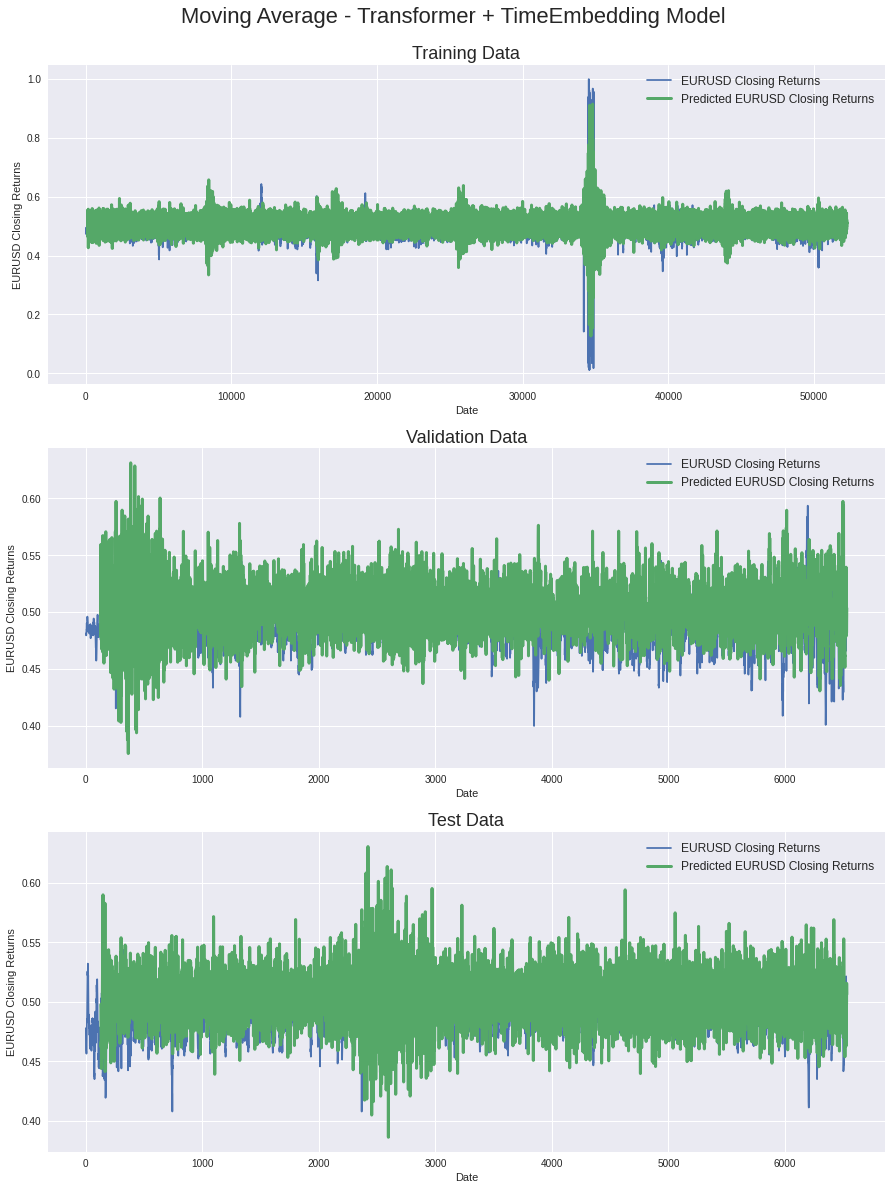

In [38]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 7))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  model = Model(inputs=in_seq, outputs=out)
  opt = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(loss='mse', optimizer=opt, metrics=['mae', 'mape'])
  return model


model = create_model()
model.summary()

callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5', 
                                              monitor='val_loss', 
                                              save_best_only=True, 
                                              verbose=1)

history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=300, 
                    callbacks=[callback],
                    validation_data=(X_val, y_val))  

model = tf.keras.models.load_model('content/Transformer+TimeEmbedding.hdf5',
                                   custom_objects={'Time2Vector': Time2Vector, 
                                                   'SingleAttention': SingleAttention,
                                                   'MultiAttention': MultiAttention,
                                                   'TransformerEncoder': TransformerEncoder})


###############################################################################
'''Calculate predictions and metrics'''

#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

###############################################################################
'''Display results'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='EURUSD Closing Returns')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted EURUSD Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Dates')
ax11.set_ylabel('EURUSD Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='EURUSD Closing Returns')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted EURUSD Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Dates')
ax21.set_ylabel('EURUSD Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='EURUSD Closing Returns')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted EURUSD Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Dates')
ax31.set_ylabel('EURUSD Closing Returns')
ax31.legend(loc="best", fontsize=12)

## Moving Average - Model metrics

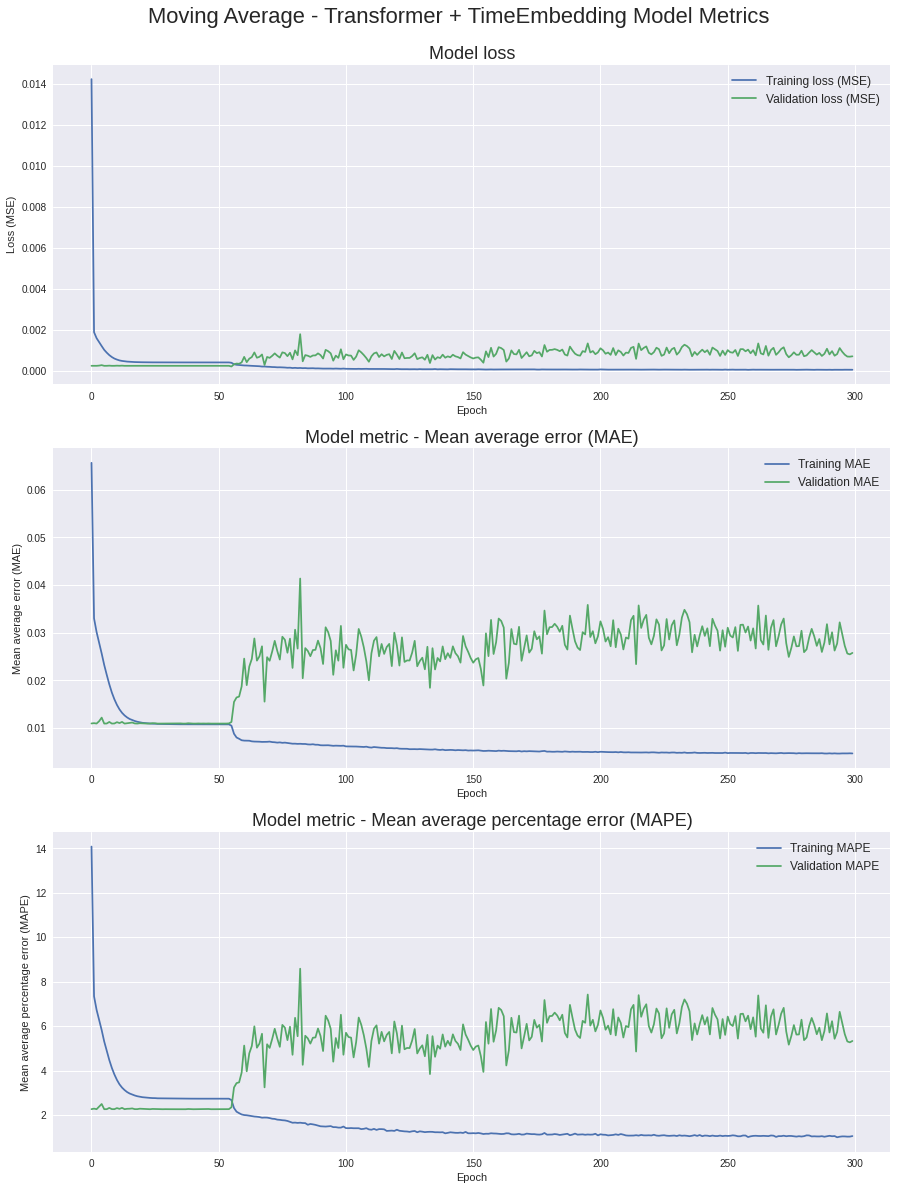

In [39]:
'''Display model metrics'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model Metrics", fontsize=22)
st.set_y(0.92)

#Plot model loss
ax1 = fig.add_subplot(311)
ax1.plot(history.history['loss'], label='Training loss (MSE)')
ax1.plot(history.history['val_loss'], label='Validation loss (MSE)')
ax1.set_title("Model loss", fontsize=18)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend(loc="best", fontsize=12)

#Plot MAE
ax2 = fig.add_subplot(312)
ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title("Model metric - Mean average error (MAE)", fontsize=18)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean average error (MAE)')
ax2.legend(loc="best", fontsize=12)

#Plot MAPE
ax3 = fig.add_subplot(313)
ax3.plot(history.history['mape'], label='Training MAPE')
ax3.plot(history.history['val_mape'], label='Validation MAPE')
ax3.set_title("Model metric - Mean average percentage error (MAPE)", fontsize=18)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean average percentage error (MAPE)')
ax3.legend(loc="best", fontsize=12)